In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats


In [3]:
libros = pd.read_csv("recursos/libros.csv")
libros.head()

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age
0,1,2.23,2.42,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,6-8
1,2,2.36,2.01,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,6-8
2,3,2.32,1.80,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,6-8
3,4,1.82,1.48,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,6-8
4,5,1.83,2.37,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,6-8


In [4]:
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              4008 non-null   int64  
 1   specialist_rating   3999 non-null   float64
 2   reader_rating       3994 non-null   float64
 3   isbn                4008 non-null   object 
 4   isbn13              4008 non-null   int64  
 5   language_code       4008 non-null   object 
 6   num_pages           4008 non-null   int64  
 7   ratings_count       4008 non-null   int64  
 8   text_reviews_count  4008 non-null   int64  
 9   publication_date    4008 non-null   object 
 10  publisher           4008 non-null   object 
 11  age                 4000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 375.9+ KB


Podemos deterrminar que:
- Tiene 12 variables
- La mayoria de las variables son numericas, salvo el idioma, fecha, editorial y edades recomendadas
- que las columnas de los ratings tienen Nan

In [5]:
libros.describe()

,bookID,specialist_rating,reader_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,4008.000000,3999.000000,3994.000000,4.008000e+03,4008.000000,4.008000e+03,4008.000000
mean,2001.524701,5.760225,4.384782,9.759814e+12,344.100549,2.901464e+04,811.003743
std,1154.588013,2.606318,2.589862,4.436218e+11,240.812451,1.469707e+05,3070.664034
min,1.000000,-0.480000,-0.640000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,1002.750000,3.485000,2.140000,9.780330e+12,196.000000,1.410000e+02,12.000000
50%,2002.500000,6.410000,3.770000,9.780553e+12,303.500000,1.062500e+03,72.000000
75%,3001.250000,7.970000,6.627500,9.780826e+12,430.000000,7.981500e+03,353.250000
max,4000.000000,10.520000,10.440000,9.789999e+12,3342.000000,2.530894e+06,56604.000000


La informacion estadisitca que obtenemos es que el promedio del rating de los lectores es 4,38 y el de los especialistas es 5,7.  Podemos ver que tenemos 4008 libros en el dataset, con un pormedio de paginas de 344.
Ademas el promedio de bbok id o del isbn13 no tienen sentido estadistico.
Tambien el promedio de text review counts tampoco  no tiene sentido.
Ademas, el maximo de de los ratings es 10,44 y 10,52 mientras que los minimos son negativos, lo que implica una gran diferencia y no tiene sentido. 
Podemos detrminar que no se distribuyen de manera normal al no coincidir la media y la mediana

POdemos determinar cuantos libros tienen rating altos

<Figure size 1000x1000 with 0 Axes>

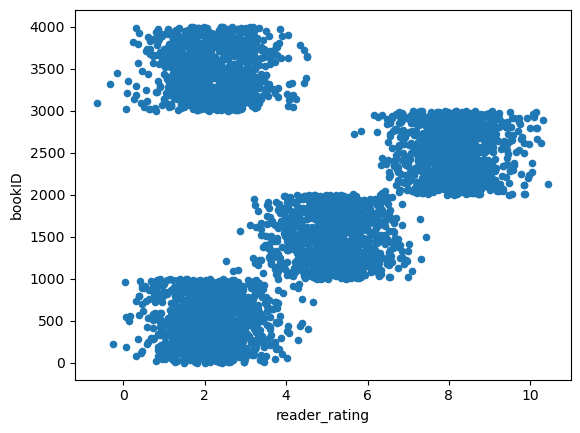

In [6]:
plt.figure(figsize=(10,10))
my_plot = libros.plot("reader_rating", "bookID", kind="scatter")

In [8]:
figure = my_plot.get_figure()
figure.savefig("recursos/ratings.png", dpi=300)

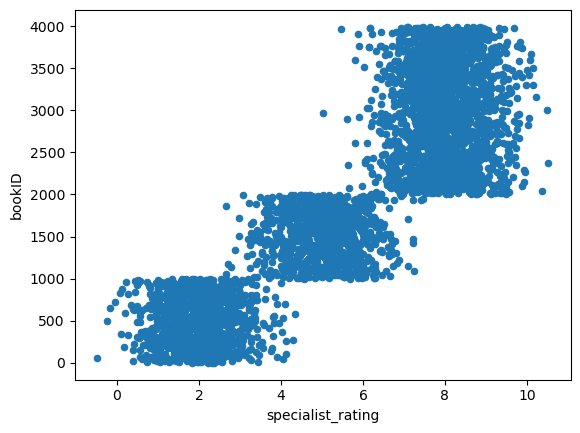

In [44]:
my_plot = libros.plot("specialist_rating", "bookID", kind="scatter")

Para saber cuántas celdas hay en nuetsra tabla sin información.

In [9]:
libros.isnull().sum()

bookID                 0
specialist_rating      9
reader_rating         14
isbn                   0
isbn13                 0
language_code          0
num_pages              0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
age                    8
dtype: int64

Podemos hacer esta inspección de los datos de forma visual:

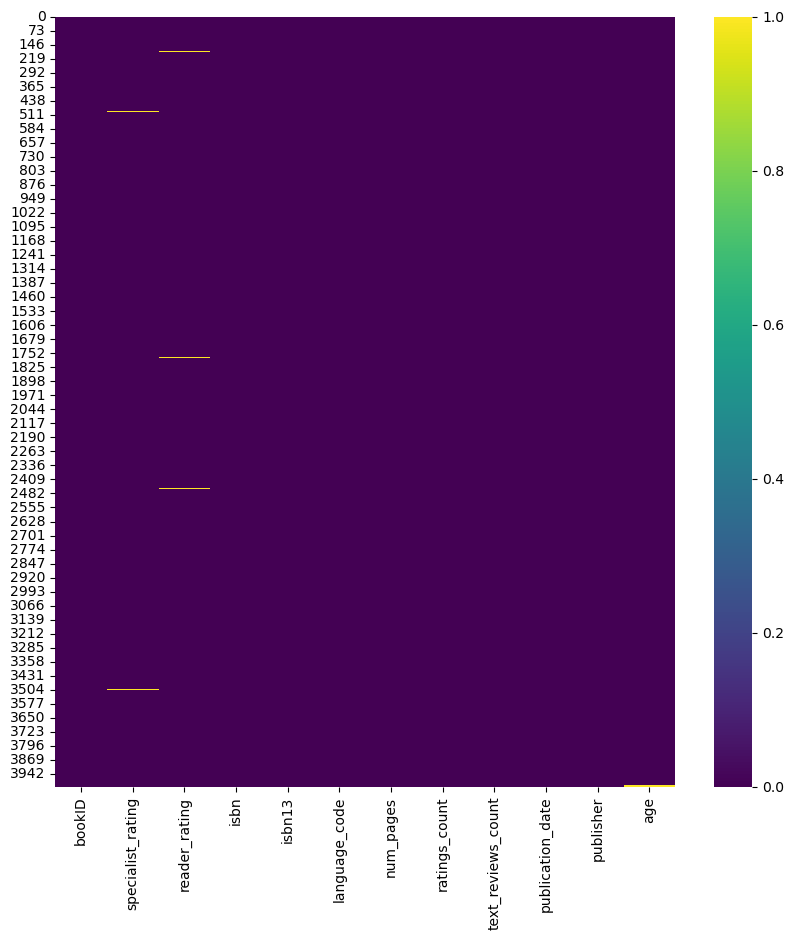

In [10]:
plt.figure(figsize=(10,10))
no_nulls = sns.heatmap(libros.isnull(), cmap='viridis')

In [11]:
figure = no_nulls.get_figure()
figure.savefig("recursos/datos_nulos.png", dpi=300)

Tambien podemos obtener el valor en forma porcentual, para entender mejro su incidencia

In [12]:
nan_ratio = ((libros.isnull().sum() / len(libros))*100).sort_values(ascending = False)
nan_ratio

reader_rating         0.349301
specialist_rating     0.224551
age                   0.199601
bookID                0.000000
isbn                  0.000000
isbn13                0.000000
language_code         0.000000
num_pages             0.000000
ratings_count         0.000000
text_reviews_count    0.000000
publication_date      0.000000
publisher             0.000000
dtype: float64

Al determinar que la cantidad de datos nulos es baja, podemos eliminar dichos datos

In [13]:
libros.dropna(inplace=True) 

In [14]:
columnas = list(libros.columns) 
columnas

['bookID',
 'specialist_rating',
 'reader_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'age']

Si yo hago un analisis de media de la columna tipo, no te va a dar una distribucion, las tengo que sacar

In [15]:
del(columnas[0])

In [16]:
columnas

['specialist_rating',
 'reader_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'age']

In [17]:
del(columnas[2])

In [18]:
columnas

['specialist_rating',
 'reader_rating',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'age']

In [19]:
del(columnas[2])

In [20]:
columnas

['specialist_rating',
 'reader_rating',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'age']

In [21]:
del(columnas[4])

In [22]:
columnas

['specialist_rating',
 'reader_rating',
 'language_code',
 'num_pages',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'age']

In [23]:
del(columnas[4])

In [24]:
columnas

['specialist_rating',
 'reader_rating',
 'language_code',
 'num_pages',
 'publication_date',
 'publisher',
 'age']

In [25]:
del(columnas[5])

In [26]:
columnas

['specialist_rating',
 'reader_rating',
 'language_code',
 'num_pages',
 'publication_date',
 'age']

In [27]:
del(columnas[3])

In [28]:
columnas

['specialist_rating',
 'reader_rating',
 'language_code',
 'publication_date',
 'age']

In [36]:
del(columnas[2])

In [37]:
columnas

['specialist_rating', 'reader_rating', 'publication_date', 'age']

In [38]:
del(columnas[2])

In [39]:
columnas

['specialist_rating', 'reader_rating', 'age']

In [40]:
del(columnas[2])

In [41]:
columnas

['specialist_rating', 'reader_rating']

Informacion de si las columnas son normales o no --> tengo que tener solo valores numericos, lo mismo con el zona id

In [42]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(libros[columna].dropna())
        test[columna] = p
    return test

In [43]:
verificacion_de_medias(columnas)

{'specialist_rating': 7.800047641971229e-41,
 'reader_rating': 1.5810710443130479e-40}

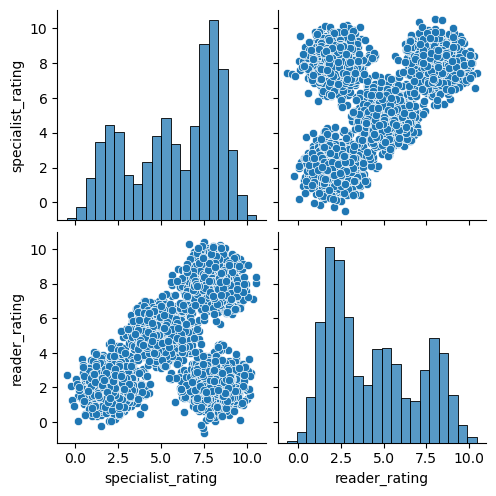

In [35]:
sns.pairplot(libros[columnas])  #lo hago para ver los outliers, para ver si estan al principio o al final

No podemos sacar o agrupar las obras por el tiempo de finalizacion porque es una franja larga para arriba, varia mucho o poco con poca gente

In [46]:
libros.quantile(0.05).to_dict()

{'bookID': 203.8,
 'specialist_rating': 1.32,
 'reader_rating': 1.14,
 'isbn13': 9780060931900.4,
 'num_pages': 51.0,
 'ratings_count': 10.0,
 'text_reviews_count': 1.0}

En base a los que se necesita decidir con los datos, nos vamos a quedar solo con las columnas de reader rating y specialist rating

Poruqe en el pairplot Vimos que tienen outliers, y como no estamos profundizando en los datos, vamos a eliminar el cuantil 0,05 y 0,95

In [47]:
Cs1 = libros["specialist_rating"].quantile(0.95)
Ci1 = libros["specialist_rating"].quantile(0.05)
Cs2 = libros["reader_rating"].quantile(0.95)
Ci2 = libros["reader_rating"].quantile(0.05)

libros1 = libros[(libros["specialist_rating"] >= Ci1) & (libros["specialist_rating"] <= Cs1) & (libros["reader_rating"] >= Ci2) & (libros["reader_rating"] <= Cs2)].reset_index(drop=True)

Cambio la composision del dataframe, ahora tiene 3248 rows

In [48]:
libros1

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age
0,1,2.23,2.42,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,6-8
1,2,2.36,2.01,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,6-8
2,3,2.32,1.80,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,6-8
3,4,1.82,1.48,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,6-8
4,5,1.83,2.37,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,6-8
...,...,...,...,...,...,...,...,...,...,...,...,...
3243,3988,8.68,1.65,316159727,9780316159722,en-US,112,373,67,9/13/2004,Little Brown and Company,16+
3244,3989,8.30,1.84,448433400,9780448433400,en-US,200,371,43,9/15/2003,Grosset & Dunlap,16+
3245,3990,7.11,1.37,1600100368,9781600100369,eng,352,168,17,1/3/2012,Library of American Comics,16+
3246,3991,7.47,1.86,752864300,9780752864303,en-US,224,267,28,3/24/2005,Orion Paperbacks,16+


Vamos a limpiar los datos: 

In [49]:
libros2 = libros1.dropna().reset_index(drop=True)

eliminamos los duplicados

In [50]:
libros3 = libros2.drop_duplicates().reset_index(drop=True)

Podemos ver que de nuevo cambio la composicion del dataframe, teniendo ahora 3242 rows

In [51]:
libros3

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age
0,1,2.23,2.42,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,6-8
1,2,2.36,2.01,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,6-8
2,3,2.32,1.80,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,6-8
3,4,1.82,1.48,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,6-8
4,5,1.83,2.37,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,6-8
...,...,...,...,...,...,...,...,...,...,...,...,...
3236,3988,8.68,1.65,316159727,9780316159722,en-US,112,373,67,9/13/2004,Little Brown and Company,16+
3237,3989,8.30,1.84,448433400,9780448433400,en-US,200,371,43,9/15/2003,Grosset & Dunlap,16+
3238,3990,7.11,1.37,1600100368,9781600100369,eng,352,168,17,1/3/2012,Library of American Comics,16+
3239,3991,7.47,1.86,752864300,9780752864303,en-US,224,267,28,3/24/2005,Orion Paperbacks,16+


Volvemos a hacer el pairplot porque ya hicimos la limpieza de las anomalias

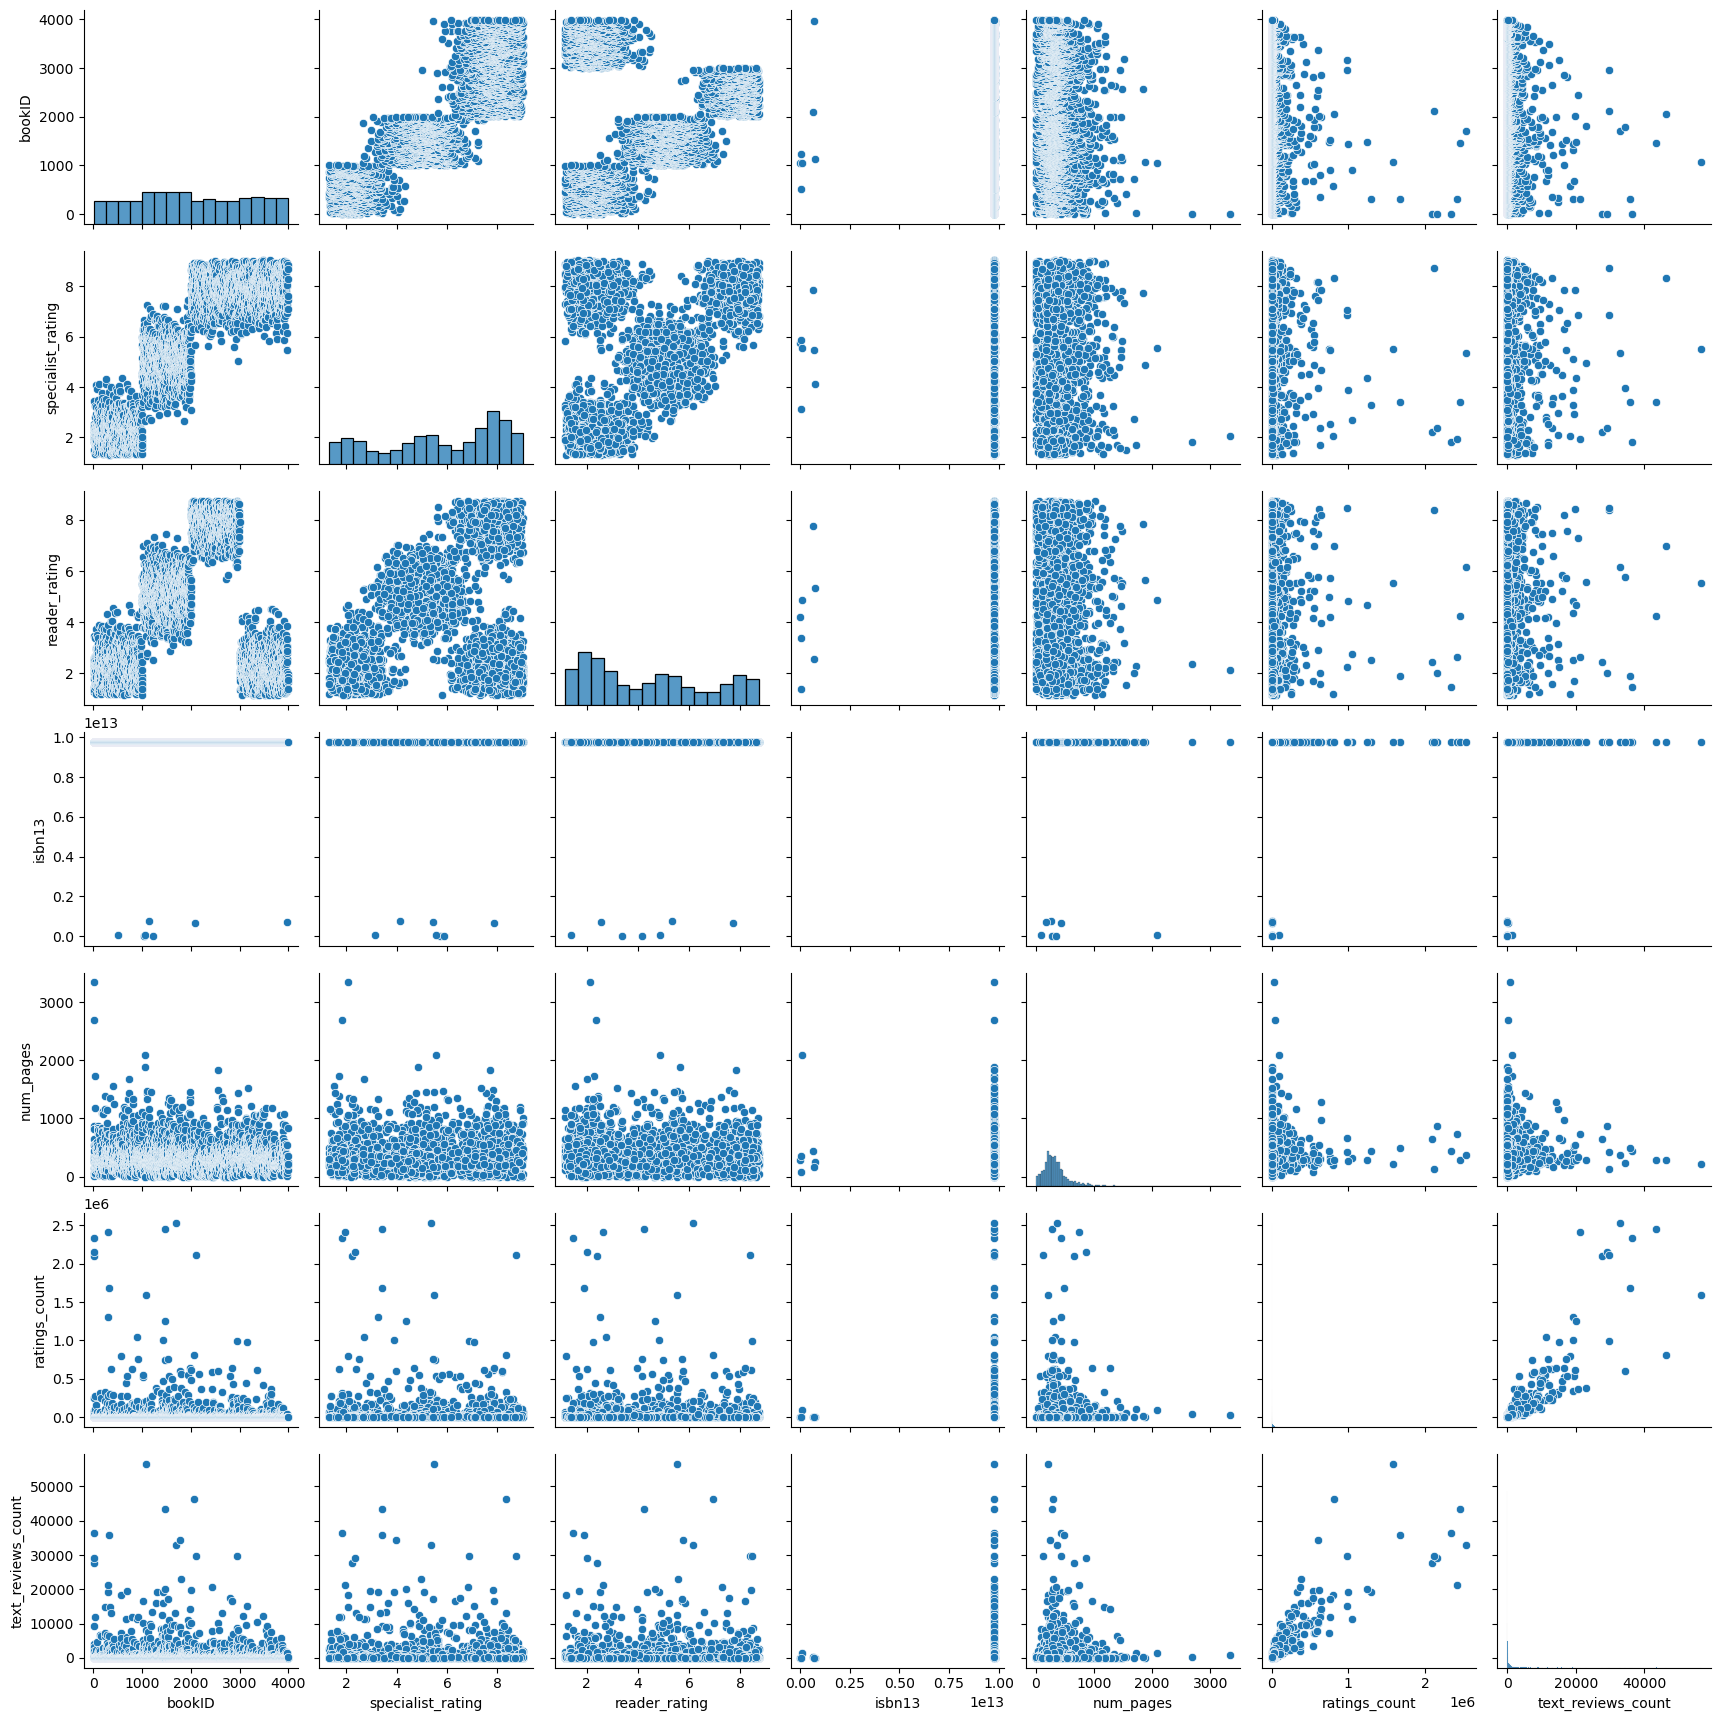

In [52]:
sns.pairplot(libros3)

isnb13 no la vamos a usar porque es una linea vertical, y no es representativa. 
Lo mismo sucede con el cuadrante superior derecho en donde se pueden ver los datos son una linea para arriba. Entonces no podemos agrupar por esas porque varia mucho con mucha o pocos libros y ratings.

Ademas los graficos del cuadrante inferior izquierdo tampoco convendria usarlo por que varian mucho los ratings y id para la canitdad de paginas, y reviews. NO tiene sentido agrupar en base a esas variables.

Book id es numerica por una cuestion practica, no podemos relacionar los book id con ninguna otra cosa poruqe es una variable categorica
rating de lectores y ratings de especialistas se pueden ver que hay posiblemente 3  o 4 grupos

Lo escalamos:

In [53]:
libros4 = libros3[columnas]

In [54]:
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(libros4)

In [55]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

In [56]:
inercias = inercias_por_k(datos_escaleado)
inercias

{1: 6482.0,
 2: 3618.3309058010836,
 3: 1668.858109378838,
 4: 591.2443540744413,
 5: 511.57034406820173,
 6: 457.23954979947354,
 7: 416.1755995897794,
 8: 366.53886084754413,
 9: 325.4065799019644,
 10: 299.23866155280564}

In [57]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])

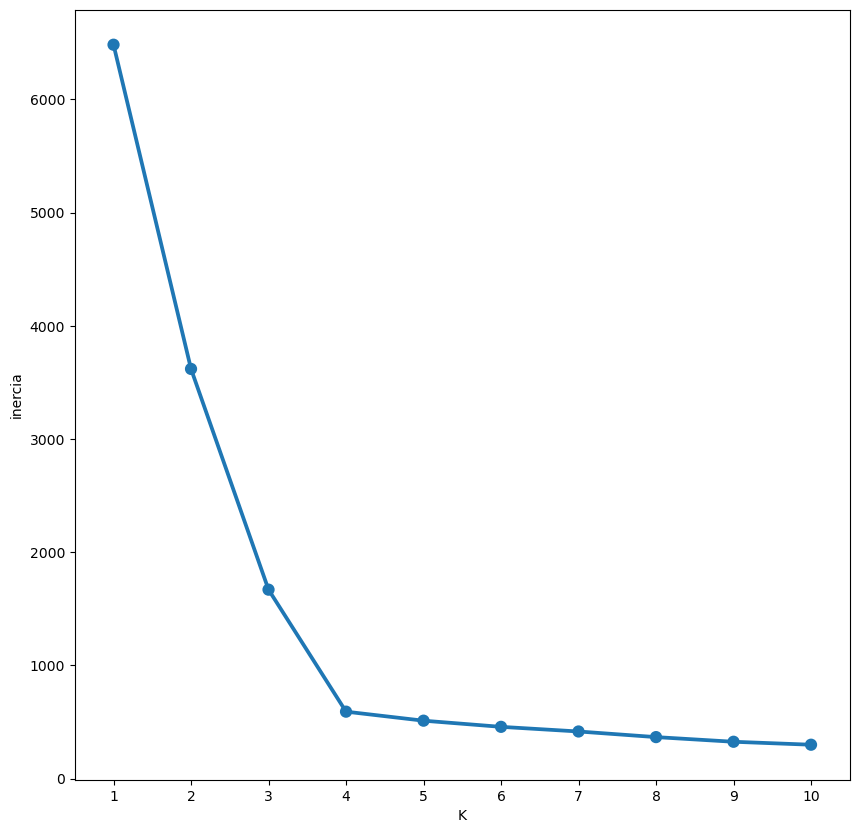

In [58]:
plt.figure(figsize=(10,10))
fig = sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [60]:
figure = fig.get_figure()
figure.savefig("recursos/codo_libros.png", dpi=300)

Suponemos que puede haber 4 grupos

In [69]:
k = 4
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=4, random_state=123457)

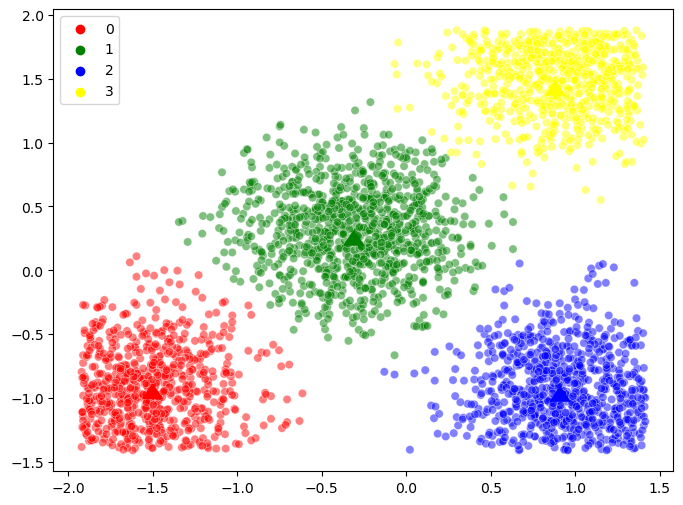

In [70]:
colores = ["red", "green", "blue", "yellow"]
plt.figure(figsize=(8,6)) 
graf = sns.scatterplot(x = datos_escaleado[:,0], y = datos_escaleado[:, 1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
graf = sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], zorder = 10, palette = colores, hue = [0, 1, 2, 3], legend = False, marker=6, s=200)

In [71]:
figure = graf.get_figure()    
figure.savefig("Recursos/clusters.png", dpi=300)

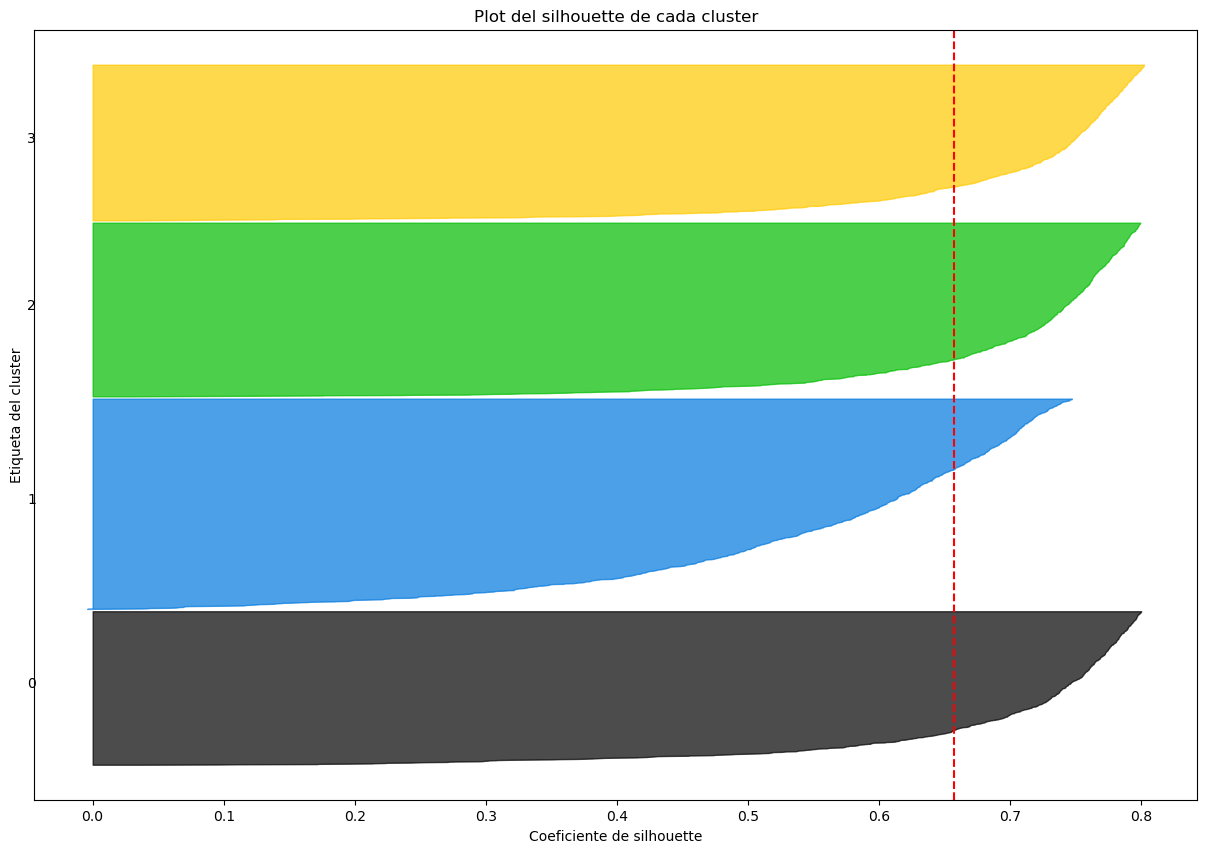

In [72]:
silhouette_avg = silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escaleado, kmeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])
  
  plt.savefig("silhouette.jpg", dpi = 300)

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [73]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [74]:
len(kmeans.labels_)

3241

In [75]:
len(libros4)

3241

La agregamos como una nueva columna:

In [77]:
libros3["Labels"] = kmeans.labels_

In [78]:
libros4

,specialist_rating,reader_rating
0,2.23,2.42
1,2.36,2.01
2,2.32,1.80
3,1.82,1.48
4,1.83,2.37
...,...,...
3236,8.68,1.65
3237,8.30,1.84
3238,7.11,1.37
3239,7.47,1.86


Obtenemos una tabla solo del grupo 2

In [80]:
libros3

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
0,1,2.23,2.42,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,6-8,0
1,2,2.36,2.01,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,6-8,0
2,3,2.32,1.80,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,6-8,0
3,4,1.82,1.48,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,6-8,0
4,5,1.83,2.37,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,6-8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,3988,8.68,1.65,316159727,9780316159722,en-US,112,373,67,9/13/2004,Little Brown and Company,16+,2
3237,3989,8.30,1.84,448433400,9780448433400,en-US,200,371,43,9/15/2003,Grosset & Dunlap,16+,2
3238,3990,7.11,1.37,1600100368,9781600100369,eng,352,168,17,1/3/2012,Library of American Comics,16+,2
3239,3991,7.47,1.86,752864300,9780752864303,en-US,224,267,28,3/24/2005,Orion Paperbacks,16+,2


La inercia nos permitio ver a traves del grafico del codo que el numero de clusters estaba entre el rango de 4 y 3, por que buscamos obtener un inercia baja pero con la menor cantidad de k. Es decir, vamos a centrarnos en el punto de inflexion del grafico (la tangente). 
A partir de ahi, pudimos ver rapidamete qu esse punto es el k = 4, que es el que mejor ajusta, porque creo que hay una buena cohesión y en los grupos no observo ningún datos cerca de menos 1.
Los valores del siluhuete son cercanos a 1, y no tiene valores negativos, ademas el grafico de agrupamiento con cuatro clusters muestra una buena agrupacion, es decir estan mas compactados, mas cerca de sus centorides. 


Para hacer las recomendaciones
- Primero descartamos el grupo 0 porque es tiene ratings bajos de los especialistas y de los lectres, esto lo vemos en el grafico de clusters que tiene en en eje Y el de los especialistas y el de los lecotrs en el X.
- Eliminamos el 1 poruqe tiene alto rating de especialistas pero bajo de lectores
- El 2 podria llegar a ser un buen grupo tambien , pero creo que el 3 es el mejor ya que tiene el mejora rating tanto de especialistas como de lectores.

In [81]:
datos_finales = libros3[libros3["Labels"] == 3].reset_index(drop=True)
datos_finales

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
0,1096,7.24,7.09,014018533X,9780140185331,eng,157,1322,109,7/1/1992,Penguin Books Ltd,6-8,3
1,1234,5.64,7.32,074757362X,9780747573623,eng,480,3141,140,7/1/2008,Bloomsbury UK,8-10,3
2,1325,6.45,6.53,1561643424,9781561643424,eng,185,45,9,1/1/2005,Pineapple Press,10-13,3
3,1378,6.61,6.75,006054094X,9780060540944,eng,650,11751,893,1/1/2004,Harper Perennial (NYC),10-13,3
4,1452,6.79,6.32,1405052716,9781405052719,eng,4,13,1,9/1/2006,MacMillan Audio,13-16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2993,8.75,8.18,679886184,9780679886181,eng,112,140,8,6/17/1997,Random House Books for Young Readers,16+,3
724,2995,8.46,8.63,140437282,9780140437287,eng,744,8156,366,2/27/2003,Penguin Books,16+,3
725,2996,7.76,8.18,8420469432,9788420469430,spa,537,199,5,11/10/2005,Alfaguara,6-8,3
726,2998,8.45,7.33,156029812,9780156029810,eng,400,3912,209,6/7/2004,Mariner Books,6-8,3


Las recomendaciones nuestra son:
- Enfocarse en las categorias por edad: las clasificaciones son 6-8, 8-10, 10-13, 13-16 y 16+
- Luego centrarse en las de mayor ranking de lectores

In [89]:
datos_finales['age'].value_counts()

13-16    224
16+      212
10-13    113
6-8      104
8-10      75
Name: age, dtype: int64

Para eso nos quedamos con los libros agrupados para cada edad, pero con solo los 10 con mejor rating de lectores.

In [101]:
recomendaciones_6 =datos_finales[datos_finales["age"] == "6-8"].sort_values("reader_rating", ascending= False).head(10)
recomendaciones_6

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
48,2058,8.91,8.74,802140181,9780802140180,eng,289,65998,2497,1/26/2004,Grove Press,6-8,3
41,2049,7.86,8.72,671624970,9780671624972,en-US,304,134,12,12/31/1987,Simon & Schuster,6-8,3
14,2015,7.55,8.71,60539097,9780060539092,eng,592,10537,806,8/17/2004,It Books,6-8,3
30,2035,6.32,8.70,664226108,9780664226107,eng,169,577,67,10/31/2003,Westminster John Knox Press,6-8,3
79,2102,8.14,8.68,393926796,9780393926798,eng,490,359,35,5/1/2007,W. W. Norton & Company,6-8,3
22,2026,8.58,8.62,743222636,9780743222631,en-US,480,72,4,6/8/2004,Atria Books,6-8,3
73,2094,6.68,8.61,767901576,9780767901574,en-US,432,12034,285,6/15/1998,Harmony,6-8,3
38,2046,8.24,8.58,156031442,9780156031448,eng,358,7633,975,1/2/2006,Harcourt,6-8,3
66,2081,8.00,8.57,375760911,9780375760914,en-GB,225,16133,1099,7/2/2002,Villard,6-8,3
15,2016,8.84,8.57,312319738,9780312319731,eng,448,1171,135,10/8/2003,St. Martin's Griffin,6-8,3


In [102]:
recomendaciones8 = recomendaciones_6 =datos_finales[datos_finales["age"] == "8-10"].sort_values("reader_rating", ascending= False).head(10)
recomendaciones8


,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
155,2210,8.23,8.73,64408582,9780064408585,eng,304,2722,151,12/31/2000,HarperTrophy,8-10,3
161,2219,8.25,8.72,765309041,9780765309044,eng,288,6234,337,1/24/2006,Orb Books,8-10,3
149,2202,8.64,8.65,64405443,9780064405447,en-US,260,4169,155,3/31/1996,HarperTrophy,8-10,3
110,2150,8.09,8.60,141439491,9780141439495,eng,306,194738,3485,1/30/2003,Penguin,8-10,3
129,2175,8.35,8.58,679867120,9780679867128,eng,56,3196,137,1/11/1995,Random House Books for Young Readers,8-10,3
153,2207,7.58,8.54,006440546X,9780064405461,eng,336,4586,119,3/31/1995,HarperTrophy,8-10,3
138,2187,8.39,8.53,679745394,9780679745396,eng,320,1205,100,4/27/1993,Vintage,8-10,3
126,2169,7.50,8.52,039484484X,9780394844848,eng,56,13097,324,12/9/1989,Random House Books for Young Readers,8-10,3
109,2148,8.09,8.52,486290301,9780486290300,eng,88,2474,126,4/12/1996,Dover Publications,8-10,3
182,2247,7.27,8.49,084312492X,9780843124927,eng,32,87,12,5/10/2007,Price Stern Sloan,8-10,3


In [103]:
recomendaciones10 = recomendaciones_6 =datos_finales[datos_finales["age"] == "10-13"].sort_values("reader_rating", ascending= False).head(10)
recomendaciones10

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
265,2357,8.17,8.73,449220494,9780449220498,eng,221,64,3,3/22/1992,Fawcett,10-13,3
191,2258,7.50,8.72,142302333,9780142302330,eng,1008,527,12,9/16/2002,Puffin,10-13,3
280,2380,8.33,8.67,330491237,9780330491235,eng,167,93997,1394,3/8/2002,Picador USA,10-13,3
183,2248,8.78,8.67,679801243,9780679801245,eng,32,6,0,10/14/1989,Random House for Young Readers,10-13,3
184,2249,8.53,8.67,679801154,9780679801153,eng,32,2,0,10/14/1989,Random House for Young Readers,10-13,3
190,2257,6.68,8.66,60753102,9780060753108,eng,325,3258,478,7/26/2005,HarperCollins,10-13,3
283,2385,8.64,8.65,2864603497,9782864603498,fre,108,2122,86,11/1/1998,Klincksieck,10-13,3
237,2321,8.73,8.65,1581345267,9781581345261,en-US,416,12789,221,3/11/2004,Crossway Books,10-13,3
268,2360,7.68,8.62,399244913,9780399244919,eng,32,1371,205,7/25/2006,G.P. Putnam's Sons Books for Young Readers,10-13,3
256,2343,8.60,8.61,042520846X,9780425208465,eng,320,3513,143,2/7/2006,G.P. Putnam's Sons,10-13,3


In [116]:
recomendaciones13 = recomendaciones_6 =datos_finales[datos_finales["age"] == "13-16"].sort_values("reader_rating", ascending= False).head(10)
recomendaciones13

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
411,2549,6.83,8.74,874776317,9780874776317,eng,224,1675,124,5/1/1991,Tarcherperigee,13-16,3
386,2515,7.99,8.74,081301395X,9780813013954,eng,200,15,1,4/20/1996,University Press of Florida,13-16,3
494,2673,8.74,8.73,525477624,9780525477624,eng,48,432,90,8/17/2006,Dutton Books for Young Readers,13-16,3
296,2399,8.20,8.68,1844082520,9781844082520,en-US,240,509,25,11/1/2005,Virago UK,13-16,3
410,2548,7.13,8.68,449910288,9780449910283,eng,224,911,42,9/11/1995,Ballantine Books,13-16,3
385,2514,7.33,8.67,500203520,9780500203521,eng,224,53,6,6/17/2002,Thames Hudson,13-16,3
428,2576,8.65,8.67,768423481,9780768423488,eng,256,545,44,4/1/2006,Destiny Image Incorporated,13-16,3
321,2436,8.07,8.66,448439042,9780448439044,eng,105,755,94,12/28/2006,Grosset & Dunlap,13-16,3
378,2502,6.83,8.66,688152023,9780688152024,eng,208,238,10,1/13/1997,William Morrow Paperbacks,13-16,3
432,2580,8.20,8.65,349113009,9780349113005,eng,726,72,5,2/1/2001,Little Brown Book Group,13-16,3


In [105]:
recomendaciones16 = recomendaciones_6 =datos_finales[datos_finales["age"] == "16+"].sort_values("reader_rating", ascending= False).head(10)
recomendaciones16

,bookID,specialist_rating,reader_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,age,Labels
536,2728,6.45,8.74,449911411,9780449911419,eng,408,4746,298,9/29/1996,Ballantine Books,16+,3
683,2939,6.85,8.72,385496095,9780385496094,eng,275,39822,2297,2/15/2000,Anchor,16+,3
584,2792,7.45,8.71,316525650,9780316525657,eng,414,224,37,8/21/2006,Little Brown and Company,16+,3
568,2768,7.71,8.69,312049994,9780312049997,en-US,454,249,39,9/1/1990,St. Martin's Press,16+,3
697,2954,8.40,8.68,1556591403,9781556591402,eng,320,685,36,6/1/2000,Copper Canyon Press,16+,3
580,2784,7.96,8.68,140005477X,9781400054770,eng,352,481,45,9/28/2004,Crown Forum,16+,3
640,2878,8.47,8.68,679751238,9780679751236,eng,496,1278,74,1/28/1997,Vintage,16+,3
698,2956,6.53,8.67,99486830,9780099486831,eng,340,180,25,1/5/2006,Arrow Books,16+,3
713,2978,8.61,8.67,385335989,9780385335980,eng,880,141771,5455,8/7/2001,Delta,16+,3
587,2797,7.06,8.67,426203658,9780426203650,eng,275,589,40,2/20/1992,Virgin Publishing,16+,3


Pudimos clasificarlos en base a las edades recomendadas pero no contamos con inforamcion de los generos por lo que no podemos llevar a cabo un a clasificacion en base a ese criterio